In [49]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

1. Wells production

In [2]:
production_df = pd.read_csv("production.csv")
production_df['Time'] = production_df['Month'].map(str) + '.' + production_df['Year'].map(str)
production_df

,API,Year,Month,Liquid,Gas,RatioGasOil,Water,PercentWater,DaysOn,_LastUpdate,Time
0,5005072170100,2014,11,9783,11470,1.172442,10558,1.079219,14,2016-04-06 17:20:05.757,11.2014
1,5005072170100,2014,12,24206,26476,1.093778,5719,0.236264,31,2016-04-06 17:20:05.757,12.2014
2,5005072170100,2015,1,20449,26381,1.290088,2196,0.107389,31,2016-04-06 17:20:05.757,1.2015
3,5005072170100,2015,2,6820,10390,1.523460,583,0.085484,28,2016-04-06 17:20:05.757,2.2015
4,5005072170100,2015,3,7349,7005,0.953191,122,0.016601,13,2016-06-16 14:07:33.203,3.2015
...,...,...,...,...,...,...,...,...,...,...,...
1195,49021210550000,2015,10,1262,665,0.526941,341,0.270206,31,2016-04-06 15:40:34.957,10.2015
1196,49021210550000,2015,11,1410,826,0.585816,572,0.405674,30,2016-04-06 15:40:34.957,11.2015
1197,49021210550000,2015,12,1443,895,0.620236,620,0.429660,31,2016-04-06 15:40:34.957,12.2015
1198,49021210550000,2016,1,1654,988,0.597340,808,0.488513,31,2016-04-06 15:40:34.957,1.2016


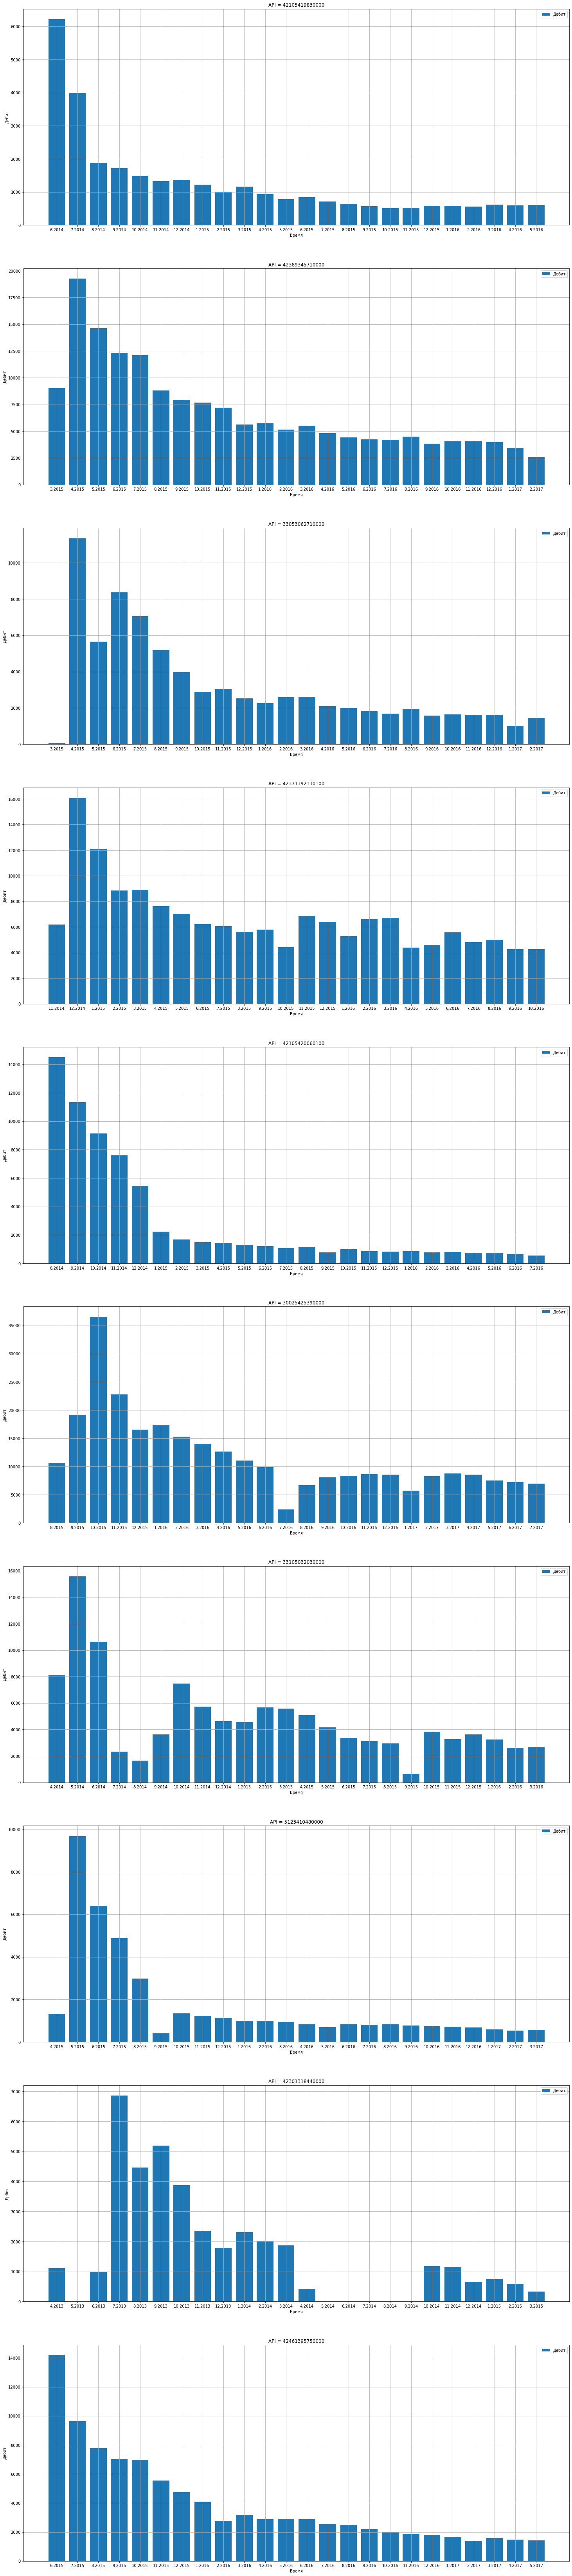

In [45]:
un_wells = pd.unique(production_df['API'])
rand_wells = np.random.choice(un_wells,10,replace = False)
fig, axes = plt.subplots(nrows = 10, ncols = 1, figsize=(25, 120))
for row, ax in enumerate(axes):
        ax.bar(production_df.loc[production_df['API'] == rand_wells[row],'Time'],
        production_df.loc[production_df['API'] == rand_wells[row],'Liquid'])
        ax.set_title('API = {}'.format(rand_wells[row]))
        ax.grid()
        ax.legend(['Дебит'])
        ax.set_xlabel('Время')
        ax.set_ylabel('Дебит')

2.More than 10%

In [17]:
rand_wells

array([ 5123379280000, 33053059400000, 42105419830000, 42371392130100,
       33105031270000, 33105037690100, 33053056550000, 49021210550000,
       33061033560000, 42317401950000], dtype=int64)

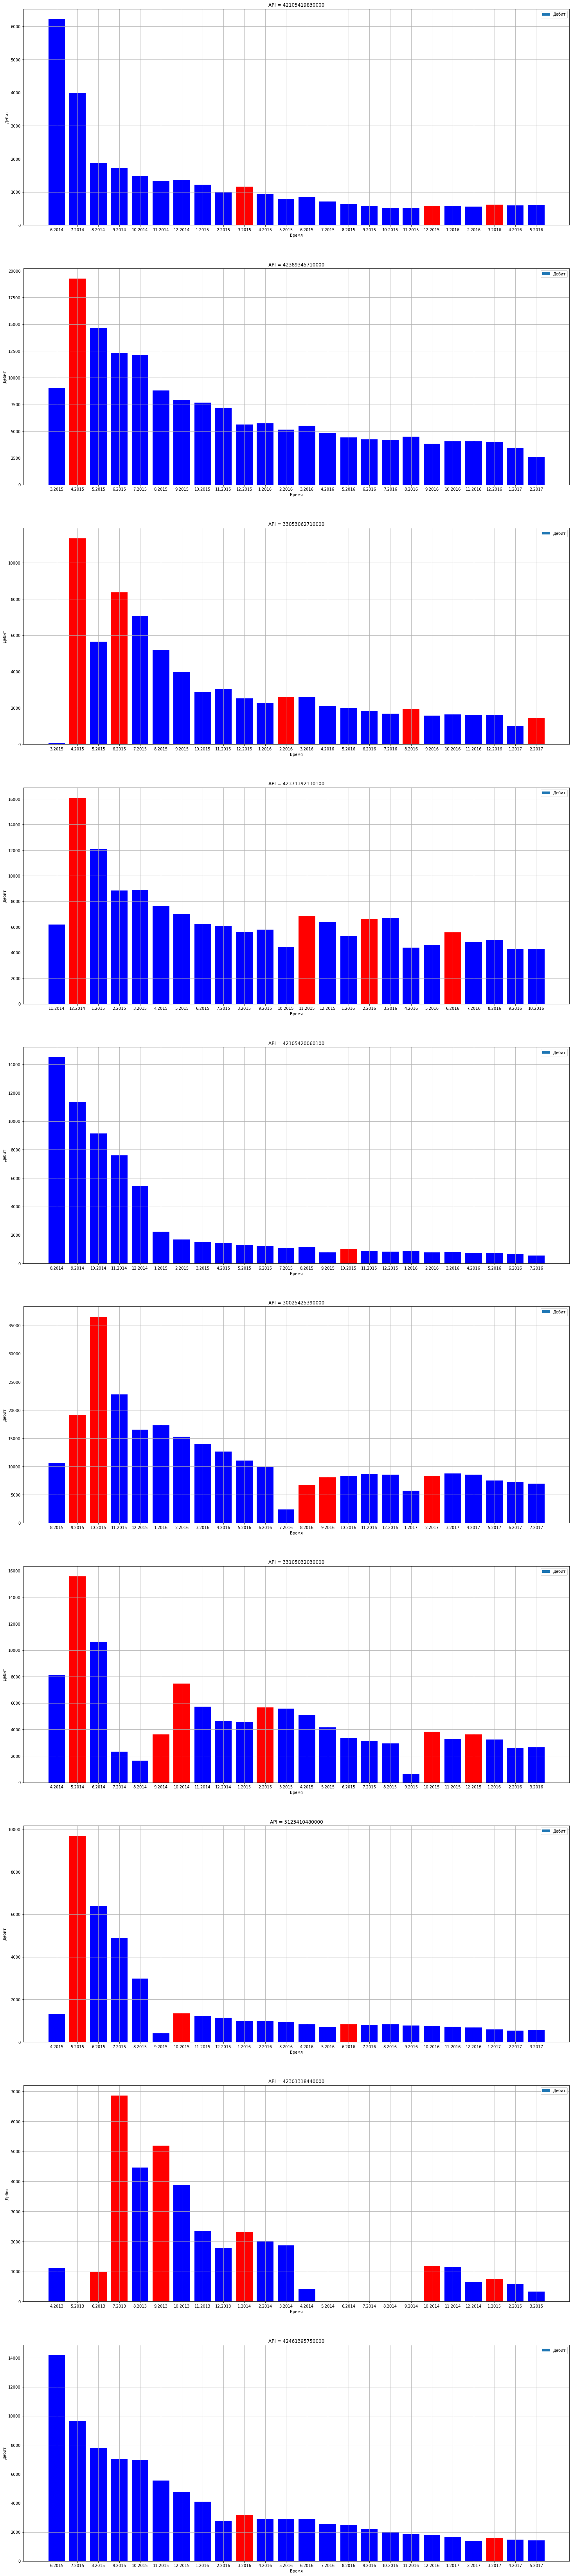

In [47]:
colors = []
for num, ax in enumerate(axes):
    well_df = production_df[production_df['API'] == rand_wells[num]]
    well_df['match'] = well_df.Liquid >= 1.1 * well_df.Liquid.shift()
    for row in well_df['match']:
        if row == True:
            colors.append('r')
        else:
            colors.append('b')
    ax.bar(production_df.loc[production_df['API'] == rand_wells[num],'Time'],
    production_df.loc[production_df['API'] == rand_wells[num],'Liquid'], color = colors)
    ax.set_title('API = {}'.format(rand_wells[num]))
    ax.grid()
    ax.legend(['Дебит'])
    ax.set_xlabel('Время')
    ax.set_ylabel('Дебит')
    colors = []
fig

3. Avg

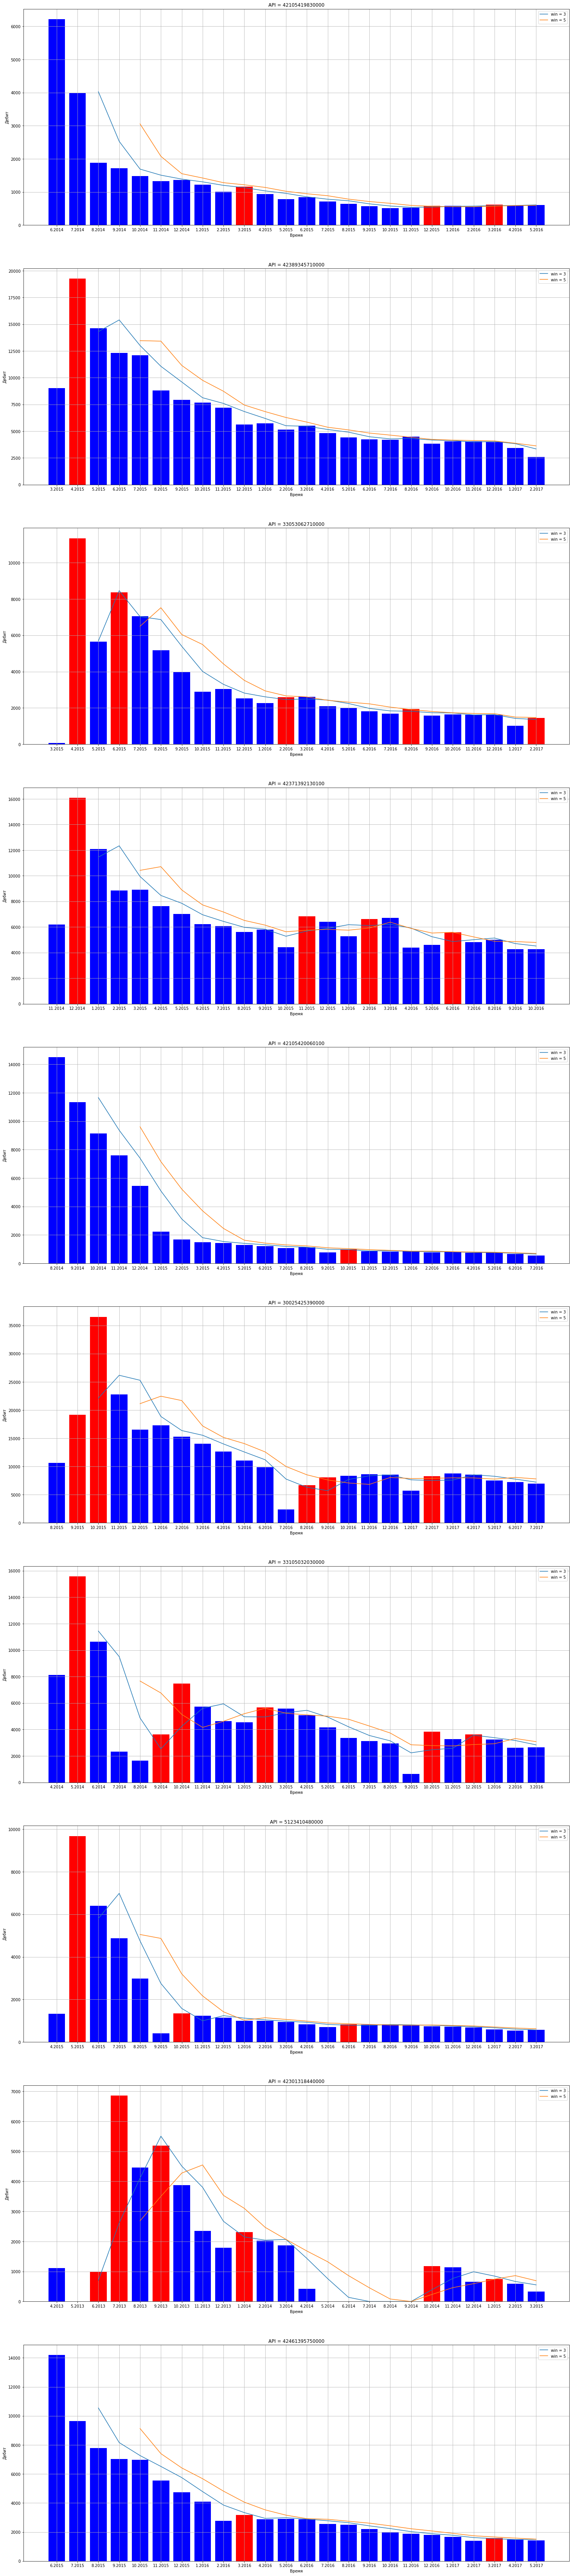

In [48]:
for num, ax in enumerate(axes):
    sr = pd.Series(production_df.loc[production_df['API'] == rand_wells[num],'Liquid'])
    index = production_df.loc[production_df['API'] == rand_wells[num],'Time']
    sr.index = index
    res_win3 = sr.rolling(3).mean()
    res_win5 = sr.rolling(5).mean()
    ax.plot(res_win3, label = 'win = 3')
    ax.plot(res_win5, label = 'win = 5')
    ax.legend()
fig

4. Production

In [56]:
new_wells = production_df.groupby("API").head(12)
new_wells = new_wells._get_numeric_data()

,API,Year,Month,Liquid,Gas,RatioGasOil,Water,PercentWater,DaysOn
0,5005072170100,2014,11,9783,11470,1.172442,10558,1.079219,14
1,5005072170100,2014,12,24206,26476,1.093778,5719,0.236264,31
2,5005072170100,2015,1,20449,26381,1.290088,2196,0.107389,31
3,5005072170100,2015,2,6820,10390,1.523460,583,0.085484,28
4,5005072170100,2015,3,7349,7005,0.953191,122,0.016601,13
...,...,...,...,...,...,...,...,...,...
1183,49021210550000,2014,10,4456,1724,0.386894,3823,0.857944,21
1184,49021210550000,2014,11,4540,1883,0.414758,4012,0.883700,26
1185,49021210550000,2014,12,3696,2134,0.577381,2771,0.749729,27
1186,49021210550000,2015,1,2288,333,0.145542,890,0.388986,22


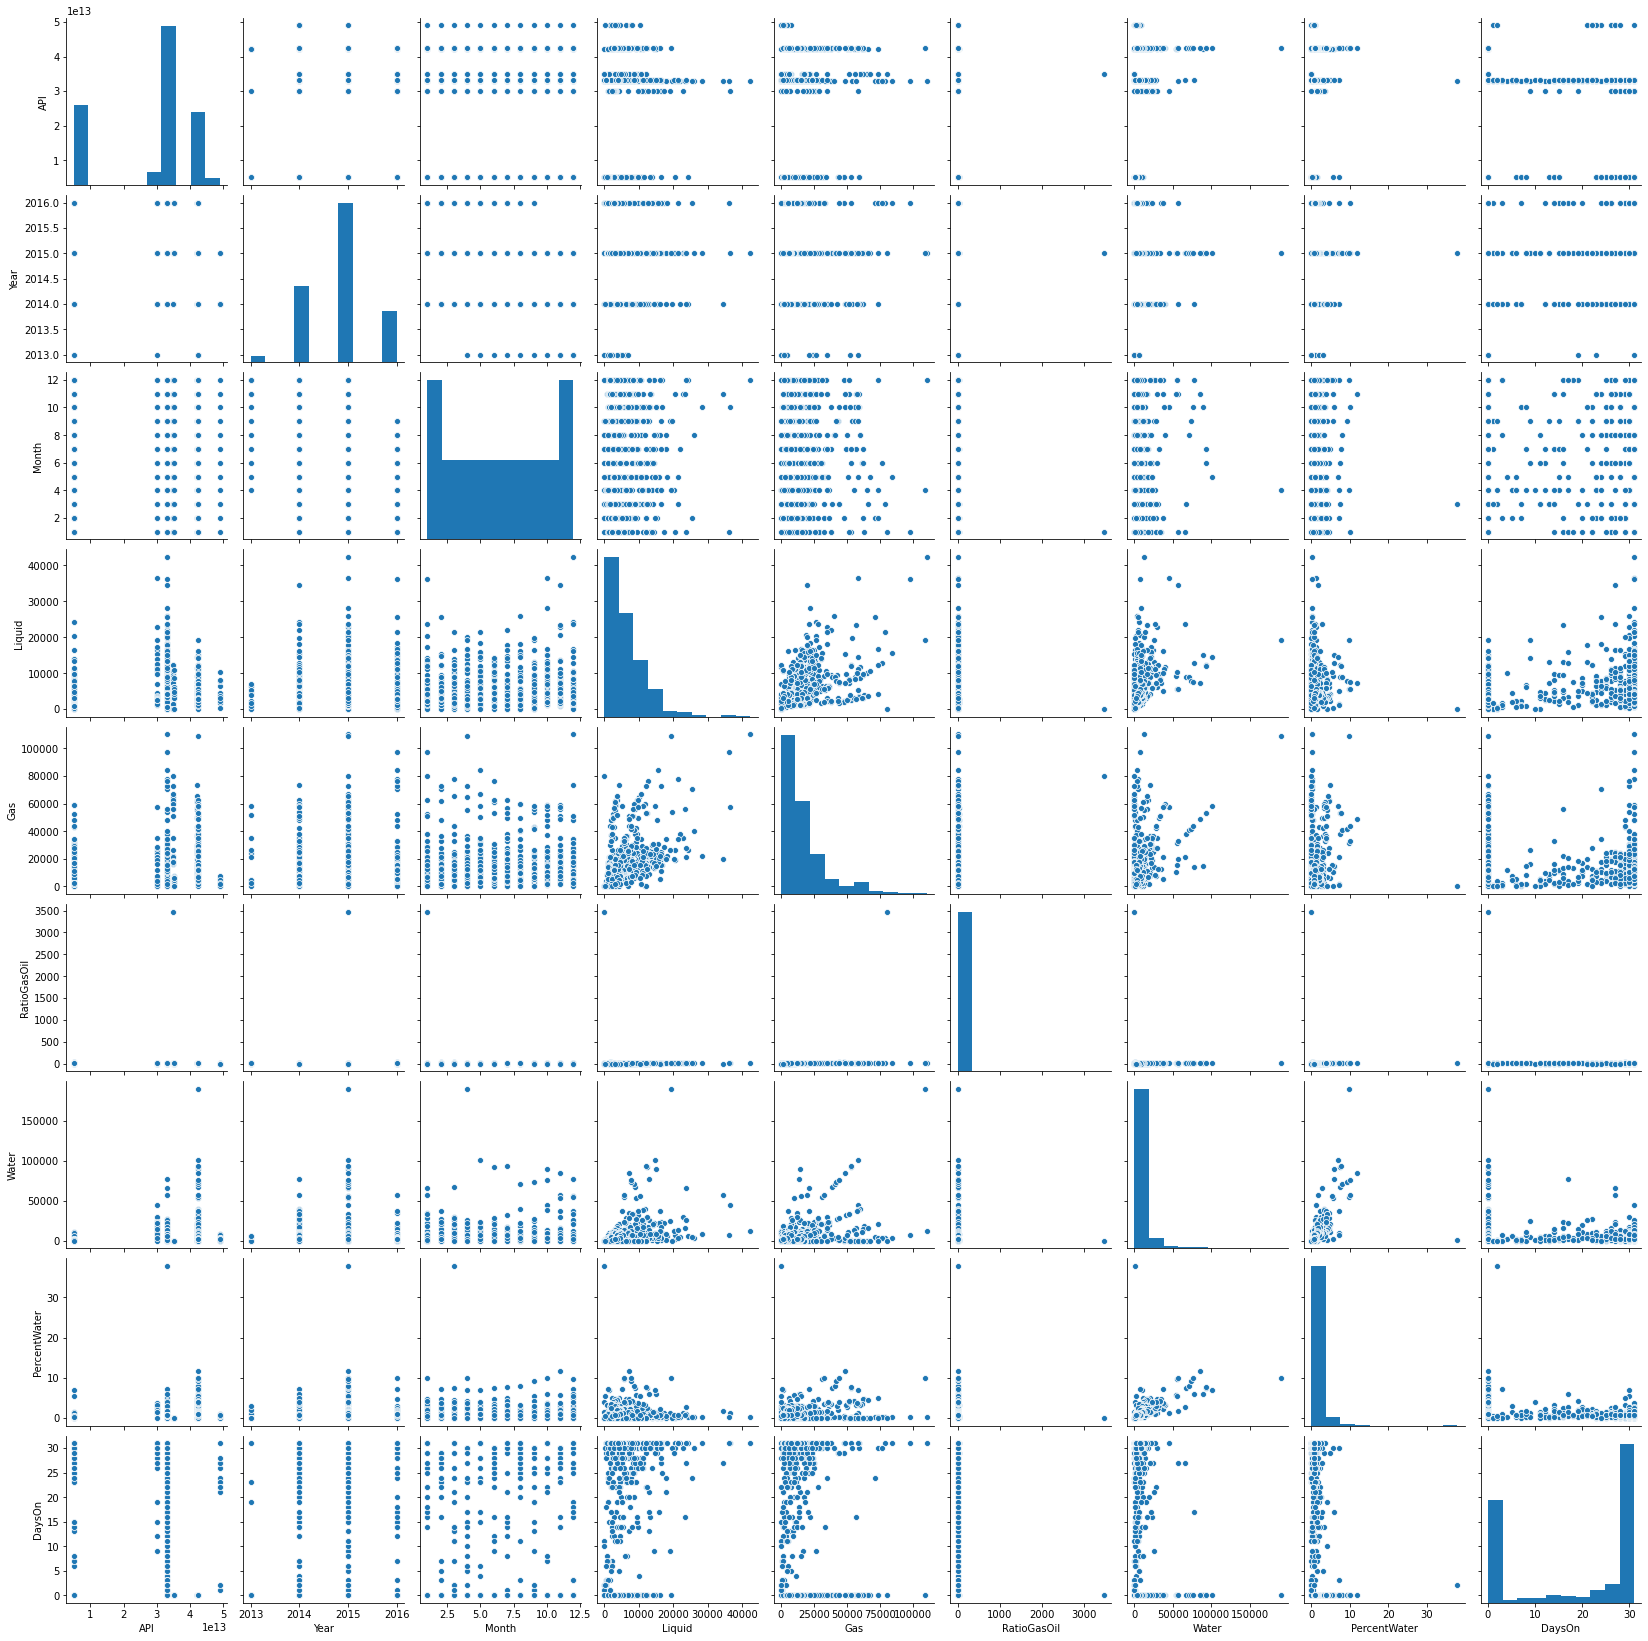

In [58]:
sns.pairplot(new_wells)
plt.show()

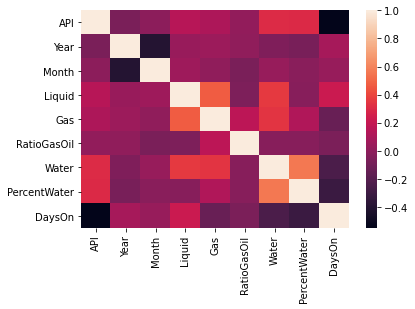

In [59]:
corr_matrix = new_wells.corr()
sns.heatmap(corr_matrix)

In [71]:
wells_info = pd.read_csv('wells_info.csv')
info_and_prod_df = pd.merge(wells_info,production_df,how ='inner', on ='API')
info_and_prod_df = info_and_prod_df.groupby('API').head(12)
info_and_prod_df

,API,PermitDate,SpudDate,CompletionDate,FirstProductionDate,operatorNameIHS,formation,BasinName,StateName,CountyName,...,Year,Month,Liquid,Gas,RatioGasOil,Water,PercentWater,DaysOn,_LastUpdate,Time
0,5005072170100,2014-05-06,2014-05-06,2014-12-02,2014-11-01 00:00:00.000,BURLINGTON RESOURCES O&G CO LP,NIOBRARA,DENVER BASIN,COLORADO,ARAPAHOE,...,2014,11,9783,11470,1.172442,10558,1.079219,14,2016-04-06 17:20:05.757,11.2014
1,5005072170100,2014-05-06,2014-05-06,2014-12-02,2014-11-01 00:00:00.000,BURLINGTON RESOURCES O&G CO LP,NIOBRARA,DENVER BASIN,COLORADO,ARAPAHOE,...,2014,12,24206,26476,1.093778,5719,0.236264,31,2016-04-06 17:20:05.757,12.2014
2,5005072170100,2014-05-06,2014-05-06,2014-12-02,2014-11-01 00:00:00.000,BURLINGTON RESOURCES O&G CO LP,NIOBRARA,DENVER BASIN,COLORADO,ARAPAHOE,...,2015,1,20449,26381,1.290088,2196,0.107389,31,2016-04-06 17:20:05.757,1.2015
3,5005072170100,2014-05-06,2014-05-06,2014-12-02,2014-11-01 00:00:00.000,BURLINGTON RESOURCES O&G CO LP,NIOBRARA,DENVER BASIN,COLORADO,ARAPAHOE,...,2015,2,6820,10390,1.523460,583,0.085484,28,2016-04-06 17:20:05.757,2.2015
4,5005072170100,2014-05-06,2014-05-06,2014-12-02,2014-11-01 00:00:00.000,BURLINGTON RESOURCES O&G CO LP,NIOBRARA,DENVER BASIN,COLORADO,ARAPAHOE,...,2015,3,7349,7005,0.953191,122,0.016601,13,2016-06-16 14:07:33.203,3.2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183,49021210550000,2013-11-13,2014-01-10,2014-05-19,2014-03-01 00:00:00.000,SAMSON EXPLORATION LLC,CODELL,DENVER BASIN,WYOMING,LARAMIE,...,2014,10,4456,1724,0.386894,3823,0.857944,21,2016-04-06 15:40:34.957,10.2014
1184,49021210550000,2013-11-13,2014-01-10,2014-05-19,2014-03-01 00:00:00.000,SAMSON EXPLORATION LLC,CODELL,DENVER BASIN,WYOMING,LARAMIE,...,2014,11,4540,1883,0.414758,4012,0.883700,26,2016-04-06 15:40:34.957,11.2014
1185,49021210550000,2013-11-13,2014-01-10,2014-05-19,2014-03-01 00:00:00.000,SAMSON EXPLORATION LLC,CODELL,DENVER BASIN,WYOMING,LARAMIE,...,2014,12,3696,2134,0.577381,2771,0.749729,27,2016-04-06 15:40:34.957,12.2014
1186,49021210550000,2013-11-13,2014-01-10,2014-05-19,2014-03-01 00:00:00.000,SAMSON EXPLORATION LLC,CODELL,DENVER BASIN,WYOMING,LARAMIE,...,2015,1,2288,333,0.145542,890,0.388986,22,2016-04-06 15:40:34.957,1.2015


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19]),
 <a list of 19 Text major ticklabel objects>)

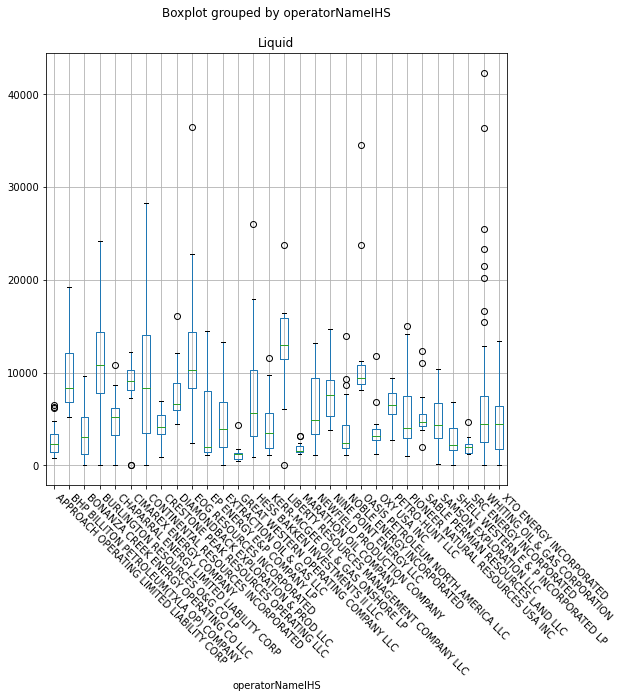

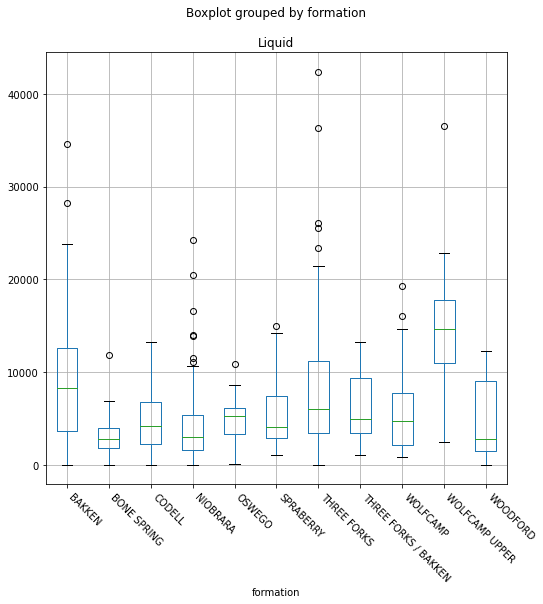

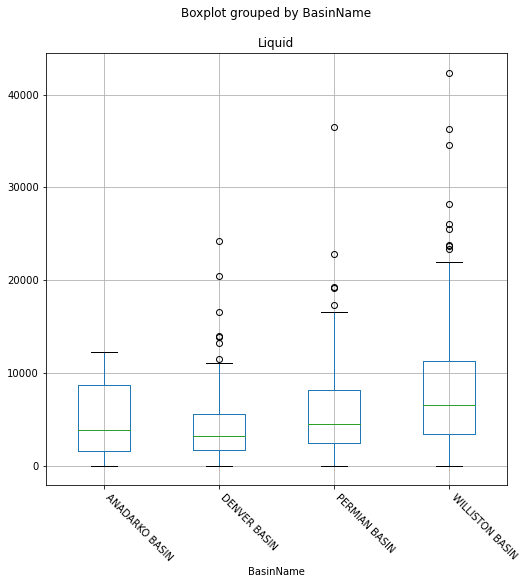

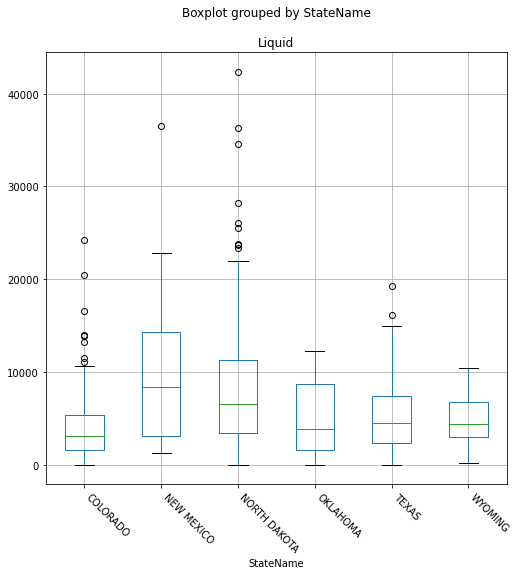

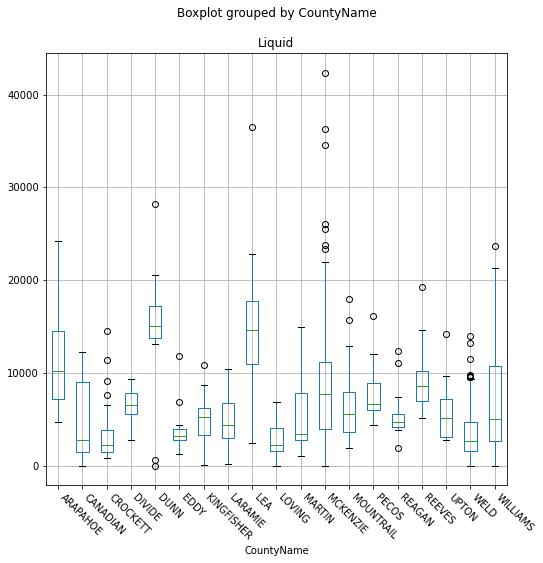

In [108]:
category = ['operatorNameIHS','formation','BasinName','StateName','CountyName']

info_and_prod_df.boxplot('Liquid', by = category[0],figsize=(8, 8))
plt.xticks(rotation=-45, ha='left')

info_and_prod_df.boxplot('Liquid', by = category[1],figsize=(8, 8))
plt.xticks(rotation=-45, ha='left')

info_and_prod_df.boxplot('Liquid', by = category[2],figsize=(8, 8))
plt.xticks(rotation=-45, ha='left')

info_and_prod_df.boxplot('Liquid', by = category[3],figsize=(8, 8))
plt.xticks(rotation=-45, ha='left')

info_and_prod_df.boxplot('Liquid', by = category[4],figsize=(8, 8))
plt.xticks(rotation=-45, ha='left')